In [1]:
# Library
import pandas as pd
import numpy as np
import sys 
# import iris
import os
import matplotlib.pyplot as plt
#from dplython import *
#    # (DplyFrame, X, diamonds, select, sift, sample_n,
#    #     sample_frac, head, arrange, mutate, group_by, summarize, DelayFunction) 
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share"; #fixr
from scipy.stats import linregress
from matplotlib import pyplot as plt
from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import linregress
from matplotlib import rcParams
from netCDF4 import Dataset
import struct
import binascii
from mpl_toolkits.basemap import addcyclic
from netCDF4 import num2date, date2num, date2index
import datetime
from pyhdf.SD import SD, SDC
import h5py
import shapefile 
from global_land_mask import globe
import reverse_geocoder


import math
from scipy.stats import t
import numpy as np, scipy.stats as st

# Anomaly

In [5]:
data_ano = pd.read_csv("./요일별_아노말리_2019.csv",encoding="CP949")

data_ano


,week,key,anomaly,weekname,contin_name,weeknum
0,일요일,Domestic_Aviation,3.185500,S,land,0
1,월요일,Domestic_Aviation,2.066044,M,land,1
2,화요일,Domestic_Aviation,3.568023,T,land,2
3,수요일,Domestic_Aviation,4.385792,W,land,3
4,목요일,Domestic_Aviation,-5.919666,T,land,4
...,...,...,...,...,...,...
499,화요일,Total,4.096229,T,SouthAmerica,2
500,수요일,Total,1.424959,W,SouthAmerica,3
501,목요일,Total,-3.263664,T,SouthAmerica,4
502,금요일,Total,-10.921582,F,SouthAmerica,5


In [6]:
data_ano = data_ano[data_ano['contin_name'] != 'Antarctica']

In [8]:
data_ano

,week,key,anomaly,weekname,contin_name,weeknum,yyyy
0,일요일,Domestic_Aviation,3.185500,S,land,0,2019
1,월요일,Domestic_Aviation,2.066044,M,land,1,2019
2,화요일,Domestic_Aviation,3.568023,T,land,2,2019
3,수요일,Domestic_Aviation,4.385792,W,land,3,2019
4,목요일,Domestic_Aviation,-5.919666,T,land,4,2019
...,...,...,...,...,...,...,...
499,화요일,Total,4.096229,T,SouthAmerica,2,2019
500,수요일,Total,1.424959,W,SouthAmerica,3,2019
501,목요일,Total,-3.263664,T,SouthAmerica,4,2019
502,금요일,Total,-10.921582,F,SouthAmerica,5,2019


In [9]:
print(np.unique(data_ano['contin_name']))
key_list = np.unique(data_ano['key'])
conatin_list = np.unique(data_ano['contin_name'])
print(key_list)

['Africa' 'Asia' 'Australia' 'Europe' 'NorthAmerica' 'SouthAmerica' 'land'
 'sea']
['Domestic_Aviation' 'Ground_Transportation' 'Industry'
 'International_Aviation' 'Power' 'Residential' 'Shipping' 'Total']


In [40]:
#data_ano = pd.read_csv("./anomaly_res/res_month_new2.csv",encoding="CP949")
#data_ano = pd.read_csv("./anomaly_res/요일별_아노말리_연도별_NEW공식.csv",encoding="CP949")
#data_ano = pd.read_csv("./anomaly_res/요일별_아노말리_2019-2021_NEW공식.csv",encoding="CP949")

data_ano = pd.read_csv("./월별_아노말리_2019-2021.csv",encoding="CP949")
data_ano = data_ano[data_ano['contin_name'] != 'Antarctica']
data_ano
data_ano['yyyy'] = 2021
data_ano

,yyyy,mm,date,key,anomaly,month_name,contin_name
0,2021,1,9999-01-01,Domestic_Aviation,4.450193,J,land
1,2021,2,9999-02-01,Domestic_Aviation,-8.187800,F,land
2,2021,3,9999-03-01,Domestic_Aviation,2.466073,M,land
3,2021,4,9999-04-01,Domestic_Aviation,-15.469632,A,land
4,2021,5,9999-05-01,Domestic_Aviation,-11.329336,M,land
...,...,...,...,...,...,...,...
859,2021,8,9999-08-01,Total,6.722915,A,SouthAmerica
860,2021,9,9999-09-01,Total,6.406171,S,SouthAmerica
861,2021,10,9999-10-01,Total,5.783064,O,SouthAmerica
862,2021,11,9999-11-01,Total,0.762345,N,SouthAmerica


In [62]:
data_ano = pd.read_csv("./월별_아노말리_2019.csv",encoding="CP949")
data_ano = data_ano[data_ano['contin_name'] != 'Antarctica']
data_ano
data_ano['yyyy'] = 2021
data_ano
print(np.unique(data_ano['key']))
      

['Domestic_Aviation' 'Ground_Transportation' 'Industry'
 'International_Aviation' 'Power' 'Residential' 'Shipping' 'Total']


    week                key   anomaly weekname   contin_name  weeknum  yyyy
0    일요일  Domestic_Aviation -5.777576        S          land        0  2021
1    월요일  Domestic_Aviation -1.037505        M          land        1  2021
2    화요일  Domestic_Aviation  0.564243        T          land        2  2021
3    수요일  Domestic_Aviation  1.784087        W          land        3  2021
4    목요일  Domestic_Aviation  4.075053        T          land        4  2021
..   ...                ...       ...      ...           ...      ...   ...
499  화요일              Total  3.938007        T  SouthAmerica        2  2021
500  수요일              Total  4.645323        W  SouthAmerica        3  2021
501  목요일              Total  4.958949        T  SouthAmerica        4  2021
502  금요일              Total  2.795642        F  SouthAmerica        5  2021
503  토요일              Total -4.006616        S  SouthAmerica        6  2021

[448 rows x 7 columns]


C:\Users\saima\AppData\Local\Temp/ipykernel_38896/567049081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ano['contin_name'][i] = 'Land'
C:\Users\saima\AppData\Local\Temp/ipykernel_38896/567049081.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ano['contin_name'][i] = 'Sea'














    week    key    anomaly weekname contin_name  weeknum  yyyy
455  일요일  Total -10.249350        S      Africa        0  2021
456  월요일  Total   0.609470        M      Africa        1  2021
457  화요일  Total   3.380076        T      Africa        2  2021
458  수요일  Total   3.861379        W      Africa        3  2021
459  목요일  Total   4.253034        T      Africa        4  2021
460  금요일  Total   2.057742        F      Africa        5  2021
461  토요일  Total  -3.912351        S      Africa        6  2021
    week    key   anomaly weekname contin_name  weeknum  yyyy
469  일요일  Total -5.344382        S        Asia        0  2021
470  월요일  Total -0.250243        M        Asia        1  2021
471  화요일  Total  1.762850        T        Asia        2  2021
472  수요일  Total  2.071389        W        Asia        3  2021
473  목요일  Total  2.164412        T        Asia        4  2021
474  금요일  Total  1.591161        F        Asia        5  2021
475  토요일  Total -1.995188        S        Asia    

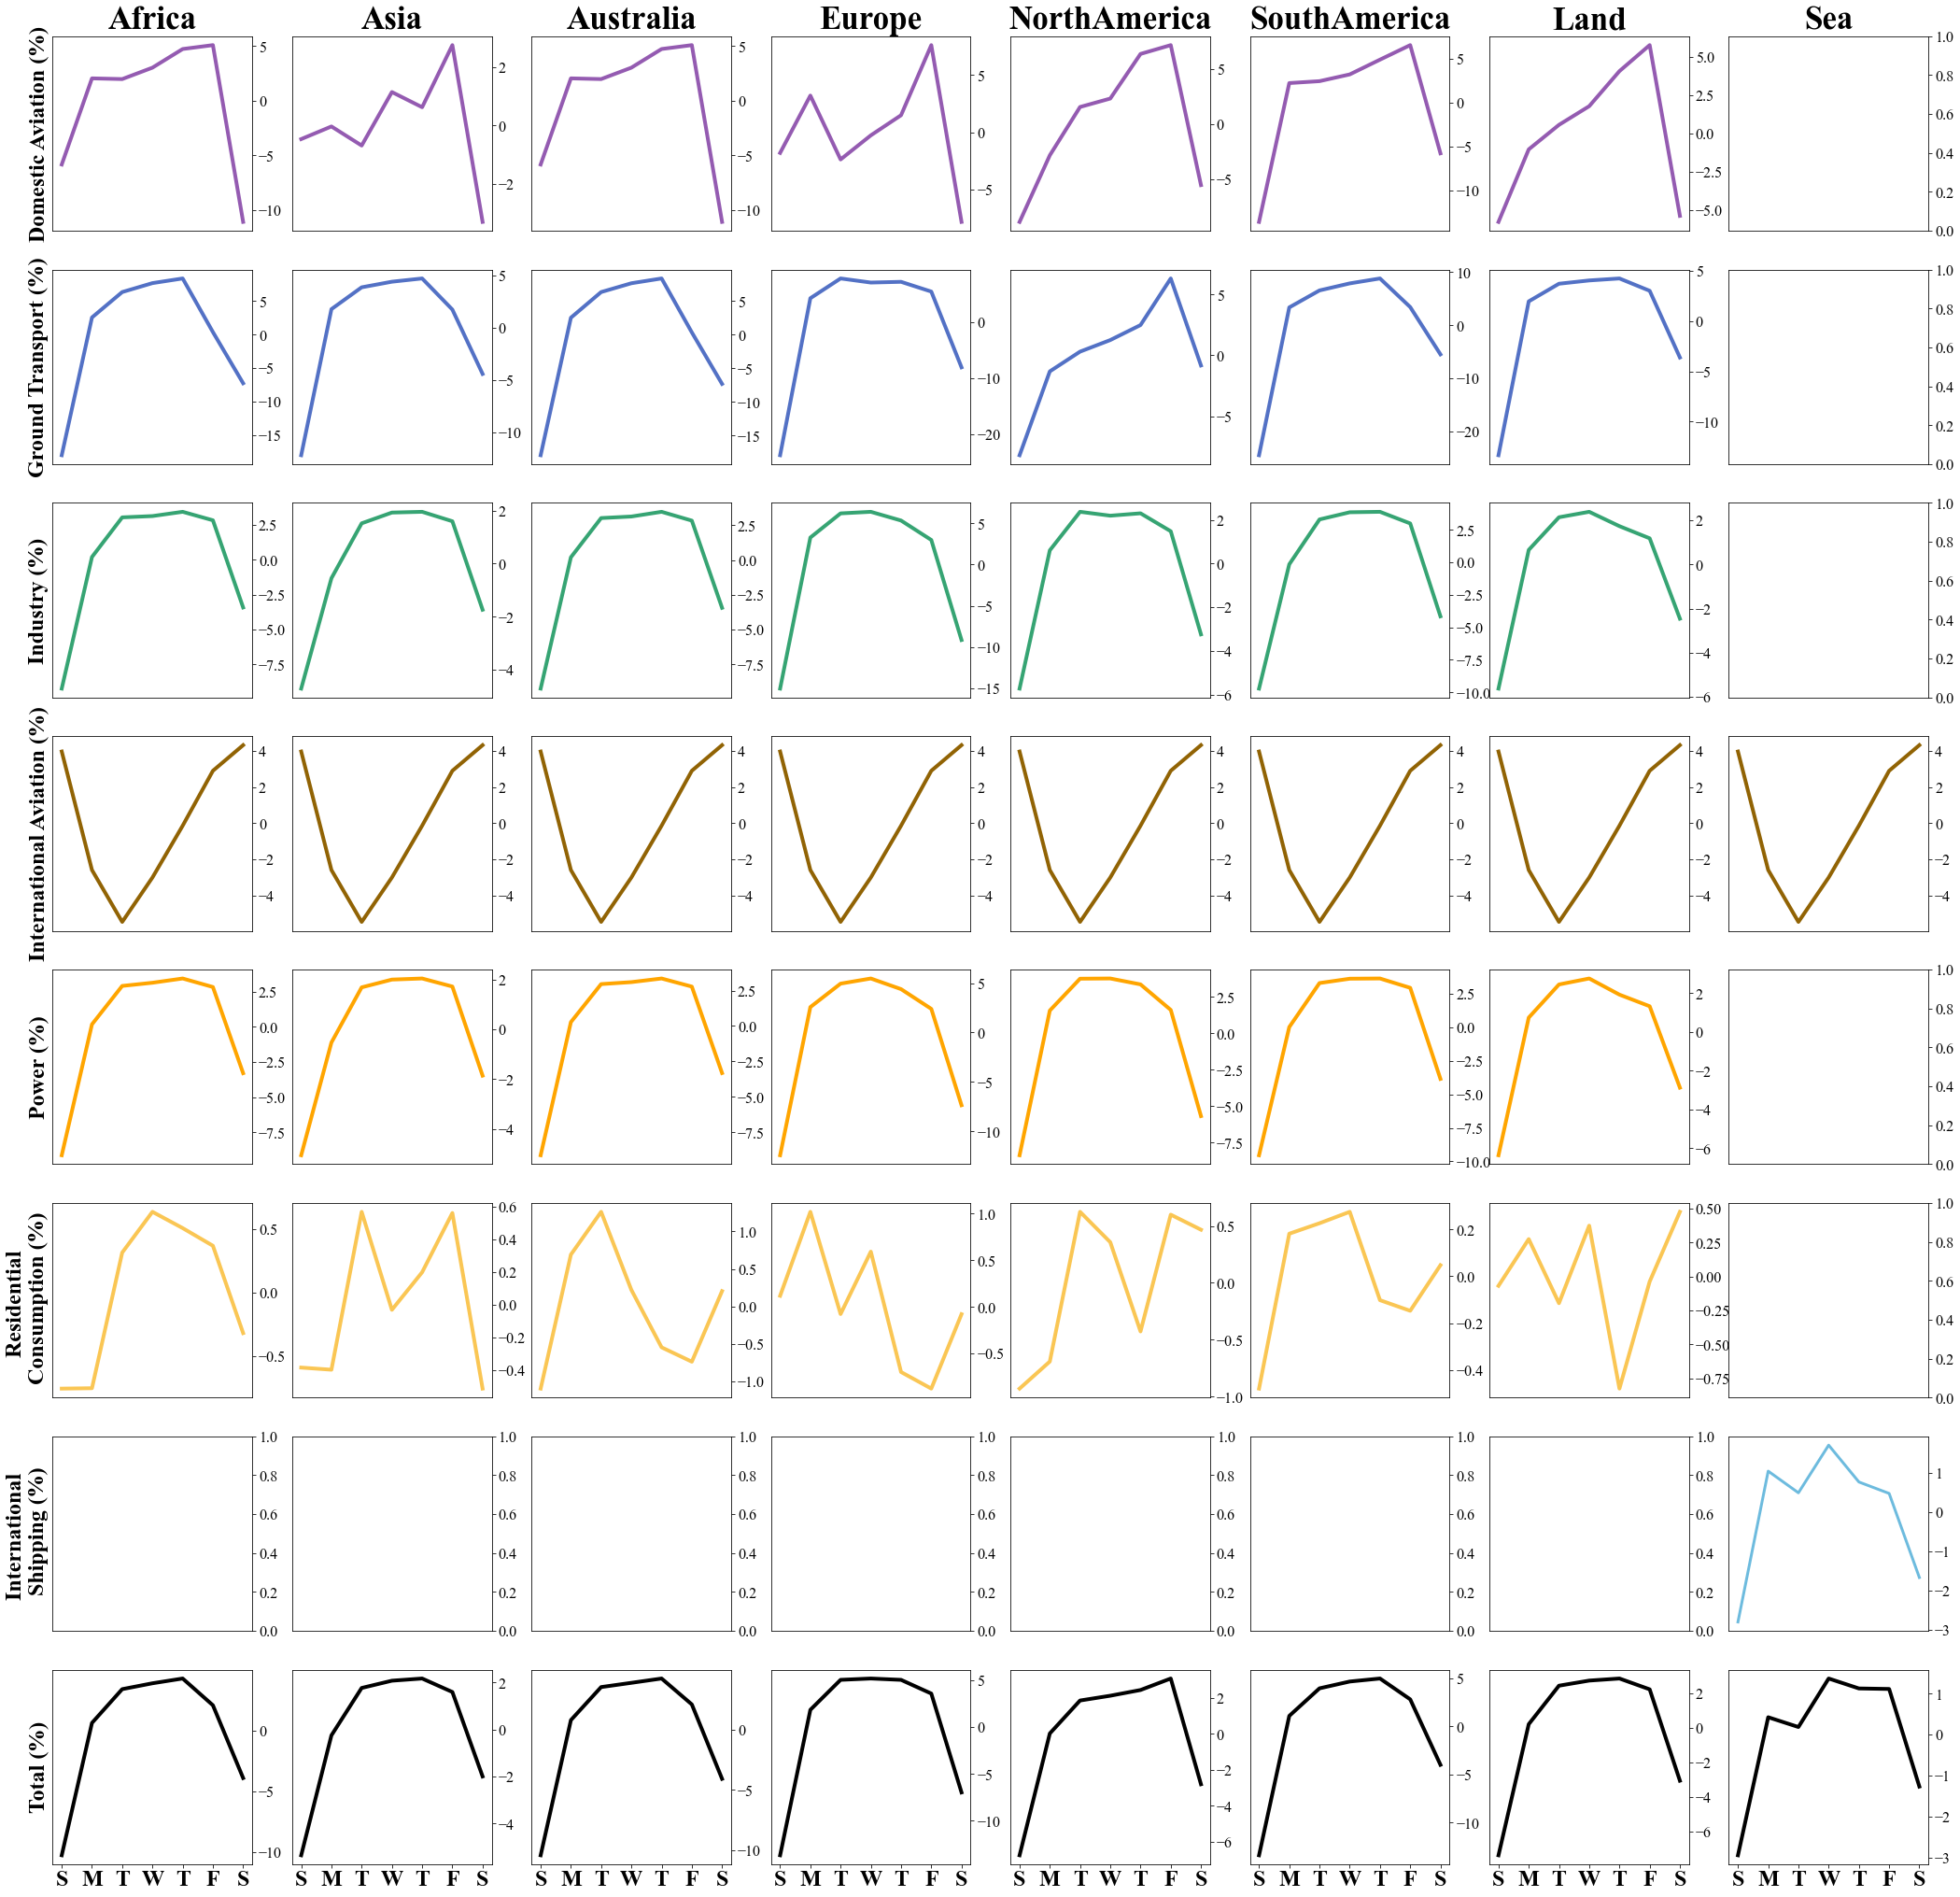

In [110]:
data_ano = pd.read_csv("./요일별_아노말리_2019-2021.csv",encoding="CP949")
data_ano = data_ano[data_ano['contin_name'] != 'Antarctica']
data_ano
data_ano['yyyy'] = 2021
print(data_ano)

for i in range(0,len(data_ano['contin_name']),1):
    try:
        if(data_ano['contin_name'][i] == 'land'):
            data_ano['contin_name'][i] = 'Land'
        if(data_ano['contin_name'][i] == 'sea'):
            data_ano['contin_name'][i] = 'Sea'
    except:
        continue
        
conatin_list = ['Africa', 'Asia', 'Australia', 'Europe', 'NorthAmerica', 'SouthAmerica', 'Land','Sea']

# First create some toy data:
fig, axs = plt.subplots(8, 8,figsize=(36,36))
#figure = figure(figsize=(24, 24), dpi=80)
plt.rcParams['savefig.facecolor']='white'
plt.rc('ytick',labelsize=16)
plt.rcParams['font.family']='Times New Roman'
ii = -1
font_props = { 'weight' : 'bold',
              'size'   : 20}


color_parrete = ['red','green','olive','blue','orange','cyan','brown','black']

for i in key_list:
    ii = ii + 1
    jj = -1
    data_ano_filter1 = data_ano[data_ano['key'] == i]
    
    for d in [2021]:
        
        #data_ano_filter2 =  data_ano_filter1[data_ano_filter1['yyyy'] == d]
        data_ano_filter2 =  data_ano_filter1

        for j in conatin_list:
            
            data_ano_filter3 =  data_ano_filter2[data_ano_filter2['contin_name'] == j]
            
            if(len(data_ano_filter3) == 0):
                data_ano_filter3 =  data_ano_filter2[data_ano_filter2['contin_name'] == "sea"]
            
            jj = jj + 1
            
            if(jj >= 8):
                continue;
            
            x = data_ano_filter3.weeknum.to_list()
            y = data_ano_filter3.anomaly.to_list()
            #y = list(map(int, y))
            labels = data_ano_filter3.weekname.to_list()
            
            if(i == "Domestic_Aviation"):
                
                iii = "Domestic Aviation"
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = '#945BB1',linewidth=4.0)
                else:
                    print("")

            elif(i == "Ground_Transportation"):
                iii = "Ground Transport"  
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = '#5371C5',linewidth=4.0)
                else:
                    print("")

            elif(i == "Industry"):
                iii = "Industry"  
                
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = '#36A473',linewidth=4.0)
                else:
                    print("")

            elif(i == "International_Aviation"):
                iii = "International Aviation" 
                axs[ii, jj].plot(x, y,color = '#916304',linewidth=4.0)
            elif(i == "Power"):
                
                iii = "Power" 
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = 'orange',linewidth=4.0)
                else:
                    print("")
                
            elif(i == "Residential"):
                
                iii = "Residential \n Consumption" 
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = '#FAC654',linewidth=4.0)
                else:
                    print("")
                
            elif(i == "Shipping"):
                iii = "International \n Shipping" 
                
                if(j == "Sea"):
                    axs[ii, jj].plot(x, y,color = '#6DBBDE',linewidth=3.0)
                else:
                    print("")
                    
            elif(i == "Total"):
                print(data_ano_filter3)
                iii = "Total" 
                axs[ii, jj].plot(x, y,color="black",linewidth=4.0)
   
            elif(i == "Antarctica"):
                continue
            else:
                iii = i

            axs[ii,jj].yaxis.tick_right()
            axs[ii,jj].tick_params(axis='both', which='major', labelsize=16)
               
            if(jj == 0):
                axs[ii,jj].set_ylabel(iii +" (%)", fontsize=24,fontweight="bold")

            if(ii == 0):
                axs[ii,jj].set_title(j, fontsize=35,fontweight="bold")

            if(ii == 7):
                axs[ii, jj].tick_params(axis='x', labelrotation=0)
                axs[ii, jj].set_xticks(range(0,len(labels)),labels, fontsize=24,fontweight="bold")
            else:
                axs[ii, jj].set_xticks([])
            
#fig.savefig('요일별_아노말리_'+str(d)+'_new.png')
fig.savefig('요일별_아노말리_2019-2021_new.png')

     yyyy  mm        date                key    anomaly month_name  \
0    2021   1  9999-01-01  Domestic_Aviation   4.450193          J   
1    2021   2  9999-02-01  Domestic_Aviation  -8.187800          F   
2    2021   3  9999-03-01  Domestic_Aviation   2.466073          M   
3    2021   4  9999-04-01  Domestic_Aviation -15.469632          A   
4    2021   5  9999-05-01  Domestic_Aviation -11.329336          M   
..    ...  ..         ...                ...        ...        ...   
859  2021   8  9999-08-01              Total   6.722915          A   
860  2021   9  9999-09-01              Total   6.406171          S   
861  2021  10  9999-10-01              Total   5.783064          O   
862  2021  11  9999-11-01              Total   0.762345          N   
863  2021  12  9999-12-01              Total  -2.664656          D   

      contin_name  
0            land  
1            land  
2            land  
3            land  
4            land  
..            ...  
859  SouthAmerica  

C:\Users\saima\AppData\Local\Temp/ipykernel_38896/1553126213.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ano['contin_name'][i] = 'Land'
C:\Users\saima\AppData\Local\Temp/ipykernel_38896/1553126213.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ano['contin_name'][i] = 'Sea'














AxesSubplot(0.125,0.125;0.0824468x0.0803191)
7 0
AxesSubplot(0.223936,0.125;0.0824468x0.0803191)
7 1
AxesSubplot(0.322872,0.125;0.0824468x0.0803191)
7 2
AxesSubplot(0.421809,0.125;0.0824468x0.0803191)
7 3
AxesSubplot(0.520745,0.125;0.0824468x0.0803191)
7 4
AxesSubplot(0.619681,0.125;0.0824468x0.0803191)
7 5
AxesSubplot(0.718617,0.125;0.0824468x0.0803191)
7 6
AxesSubplot(0.817553,0.125;0.0824468x0.0803191)
7 7


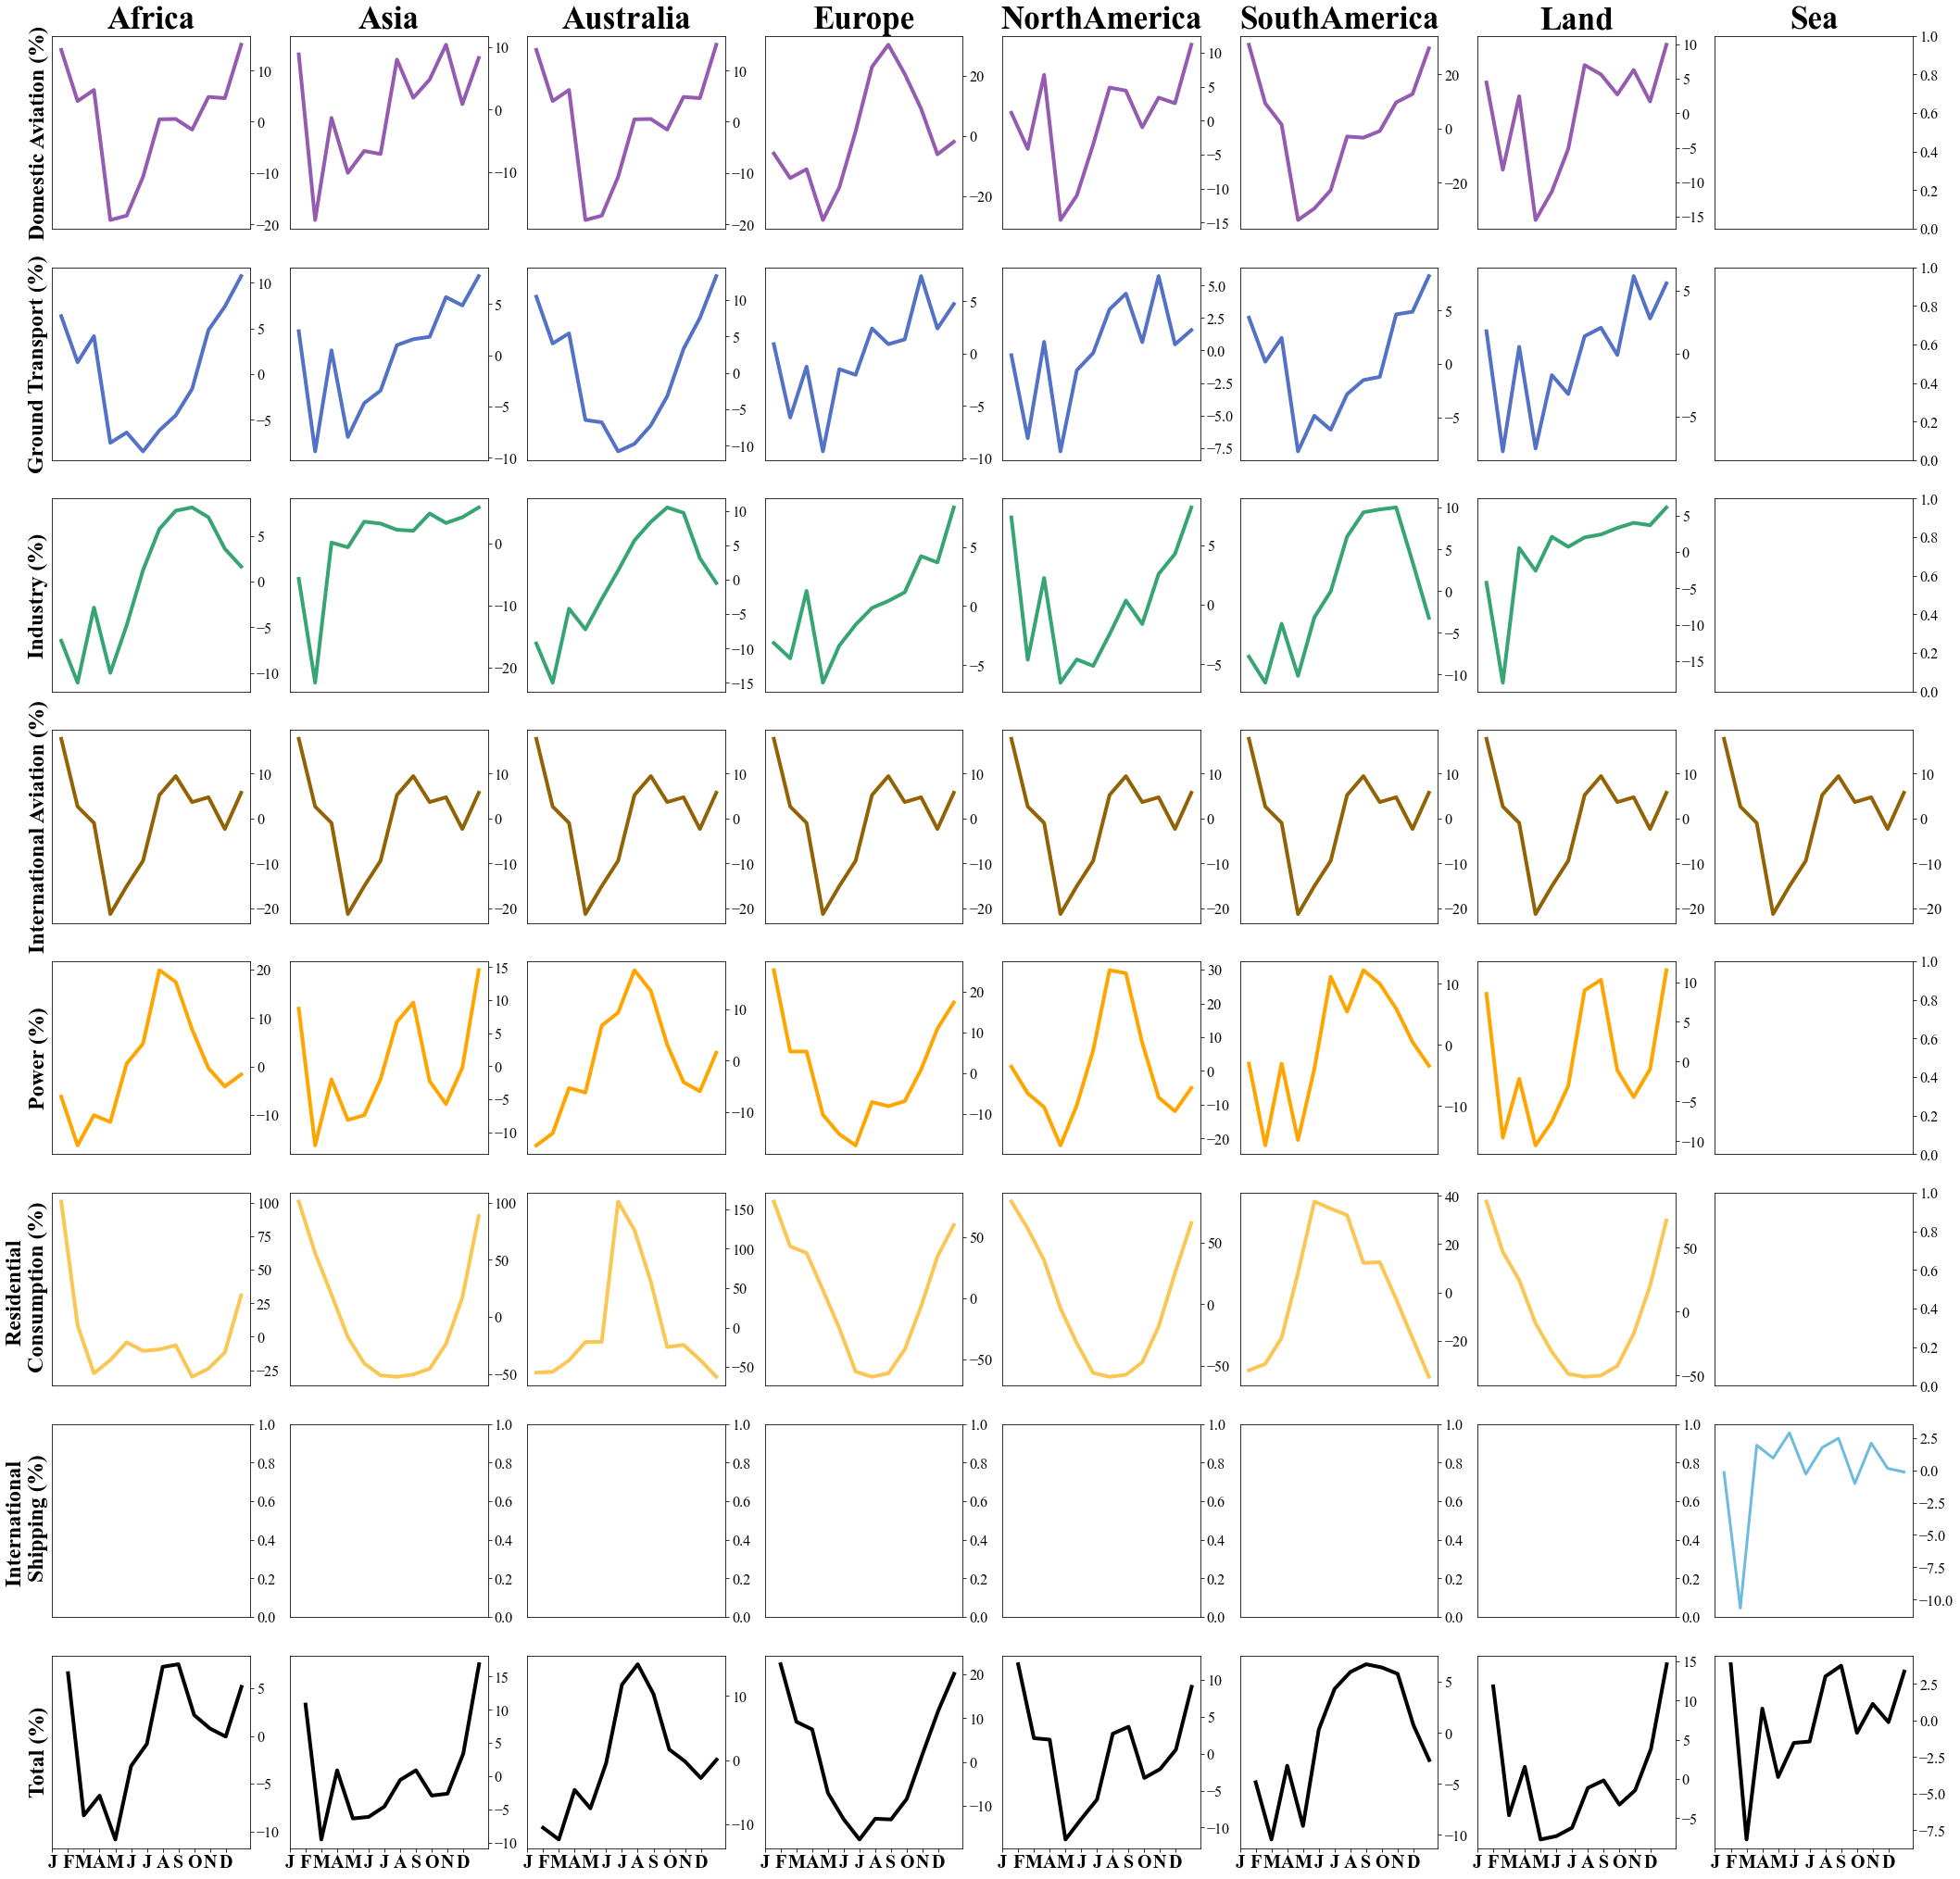

In [106]:
data_ano = pd.read_csv("./월별_아노말리_2019-2021.csv",encoding="CP949")
data_ano = data_ano[data_ano['contin_name'] != 'Antarctica']
data_ano
data_ano['yyyy'] = 2021
print(data_ano)

for i in range(0,len(data_ano['contin_name']),1):
    try:
        if(data_ano['contin_name'][i] == 'land'):
            data_ano['contin_name'][i] = 'Land'
        if(data_ano['contin_name'][i] == 'sea'):
            data_ano['contin_name'][i] = 'Sea'
    except:
        continue
        
conatin_list = ['Africa', 'Asia', 'Australia', 'Europe', 'NorthAmerica', 'SouthAmerica', 'Land','Sea']


# First create some toy data:
fig, axs = plt.subplots(8, 8,figsize=(36,36))
#figure = figure(figsize=(24, 24), dpi=80)
plt.rcParams['savefig.facecolor']='white'
plt.rc('ytick',labelsize=16)
plt.rcParams['font.family']='Times New Roman'
ii = -1
font_props = { 'weight' : 'bold',
              'size'   : 20}


color_parrete = ['red','green','olive','blue','orange','cyan','brown','black']

for i in key_list:
    ii = ii + 1
    jj = -1
    data_ano_filter1 = data_ano[data_ano['key'] == i]
    
    for d in [2021]:
        
        data_ano_filter2 =  data_ano_filter1[data_ano_filter1['yyyy'] == d]
        #data_ano_filter2 =  data_ano_filter1
        #print(data_ano_filter2)

        for j in conatin_list:
            
            data_ano_filter3 =  data_ano_filter2[data_ano_filter2['contin_name'] == j]
            if(len(data_ano_filter3) == 0):
                data_ano_filter3 =  data_ano_filter2[data_ano_filter2['contin_name'] == "sea"]
                
            jj = jj + 1
            #x = data_ano_filter3.weeknum.to_list()
            x = data_ano_filter3.mm.to_list()
            
            y = data_ano_filter3.anomaly.to_list()
            #y = list(map(int, y))
            #labels = data_ano_filter3.weekname.to_list()
            labels = data_ano_filter3.month_name.to_list()
            
            if(i == "Domestic_Aviation"):
                
                iii = "Domestic Aviation"
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = '#945BB1',linewidth=4.0)
                else:
                    print("")

            elif(i == "Ground_Transportation"):
                iii = "Ground Transport"  
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = '#5371C5',linewidth=4.0)
                else:
                    print("")

            elif(i == "Industry"):
                iii = "Industry"  
                
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = '#36A473',linewidth=4.0)
                else:
                    print("")

            elif(i == "International_Aviation"):
                iii = "International Aviation" 
                axs[ii, jj].plot(x, y,color = '#916304',linewidth=4.0)
            elif(i == "Power"):
                
                iii = "Power" 
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = 'orange',linewidth=4.0)
                else:
                    print("")
                
            elif(i == "Residential"):
                
                iii = "Residential \n Consumption" 
                if(j != "Sea"):
                    axs[ii, jj].plot(x, y,color = '#FAC654',linewidth=4.0)
                else:
                    print("")
                
            elif(i == "Shipping"):
                iii = "International \n Shipping" 
                
                if(j == "Sea"):
                    axs[ii, jj].plot(x, y,color = '#6DBBDE',linewidth=3.0)
                else:
                    print("")
                    
            elif(i == "Total"):
                
                print(axs[ii, jj])
                print(ii,jj)
                iii = "Total" 
                axs[ii, jj].plot(x, y,color="black",linewidth=4.0)
            elif(i == "Antarctica"):
                continue
            else:
                iii = i

            axs[ii,jj].yaxis.tick_right()
            axs[ii,jj].tick_params(axis='both', which='major', labelsize=16)
               
            if(jj == 0):
                axs[ii,jj].set_ylabel(iii +" (%)", fontsize=24,fontweight="bold")

            if(ii == 0):
                axs[ii,jj].set_title(j, fontsize=35,fontweight="bold")

            if(ii == 7):
                axs[ii, jj].tick_params(axis='x', labelrotation=0)
                axs[ii, jj].set_xticks(range(0,len(labels)),labels, fontsize=20,fontweight="bold")
            else:
                axs[ii, jj].set_xticks([])
            
#fig.savefig('월별_아노말리_'+str(d)+'_new.png')
fig.savefig('월별_아노말리_2019-2021_new.png')